# Plotting with pandas and seaborn
## *Python for Data Analysis* (Ch 9): Plotting & Visualization
Based on by *Python for Data Analysis* (Section 9.1, 2nd Ed.) from Wes McKinney. Code and data available from [book repository](https://resources.oreilly.com/examples/0636920023784/).

In [1]:
# %matplotlib notebook    # enables interactive features (uncomment to enable)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn

# pandas Plots
### Line Plots
In pandas, both the Series and DataFrame data structures have a `plot` attribute for basic plots. By default, `plot()` makes line plots.

Note that `df.plot()` is equivalent to `df.plot.line()`.

0    -0.078767
10    2.180748
20    1.570530
30   -0.349051
40    0.814791
50   -0.055502
60   -1.946728
70   -2.411722
80   -0.860101
90    0.821636
dtype: float64

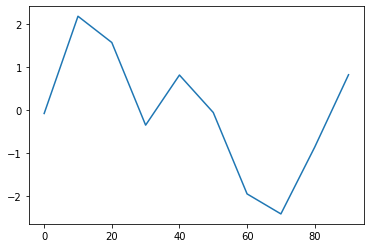

In [3]:
# Plot a pandas Series
s = pd.Series(randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()
s

,A,B,C,D
0,0.923349,-2.096082,1.245390,1.690883
10,2.713178,-3.167810,0.444546,3.500843
20,4.261165,-4.566364,-2.054483,2.709314
30,3.769470,-4.048439,-2.582136,2.491829
40,4.331995,-4.830627,-3.512806,3.665633
50,4.993737,-6.177008,-1.129189,2.565806
60,4.679826,-4.319195,-0.637883,2.169761
70,5.329865,-4.896077,-1.617934,1.841619
80,5.092635,-5.508433,-1.537703,1.154030
90,5.032008,-5.057979,-3.328630,0.893826


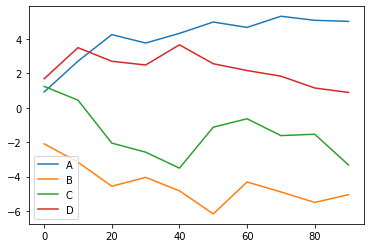

In [4]:
# Plot a DataFrame
df = pd.DataFrame(randn(10,4).cumsum(0),
                 columns = ['A', 'B', 'C', 'D'],
                 index=np.arange(0,100,10))
df.plot()
df

### Bar Plots
Make vertical bar plots with `plot.bar()` and horizontal bar plots with `plot.barh()`. The pandas Series or DataFrame index will be used as the x (`bar`) or y (`barh`) ticks.

a    0.466968
b    0.231061
c    0.726194
d    0.800965
e    0.213751
f    0.709966
g    0.135038
h    0.475577
i    0.243505
j    0.070334
k    0.570130
l    0.894017
m    0.513860
n    0.032380
o    0.306217
p    0.486290
dtype: float64

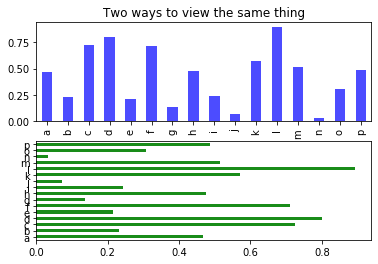

In [5]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='b', alpha=0.7)
data.plot.barh(ax=axes[1], color='g', alpha=0.9)
axes[0].set_title('Two ways to view the same thing')
data

Genus,A,B,C,D
one,0.026758,0.902477,0.845522,0.517872
two,0.052167,0.360525,0.827346,0.209856
three,0.471286,0.935403,0.723966,0.112006
four,0.678302,0.601193,0.441827,0.767407
five,0.106522,0.508491,0.788109,0.930415
six,0.275978,0.489419,0.555275,0.478627


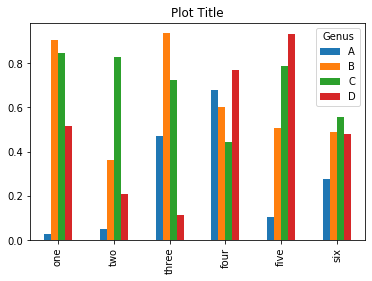

In [6]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df.plot.bar()
plt.title('Plot Title')
df

DataFrame stacked bar plot using `stacked = True`

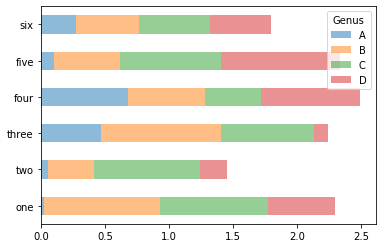

In [7]:
df.plot.barh(stacked = True, alpha = 0.5);

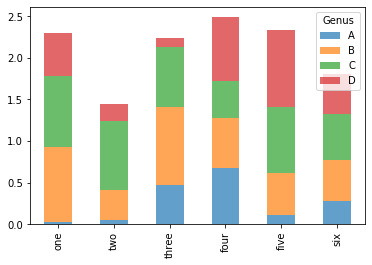

In [8]:
df.plot.bar(stacked=True, alpha = 0.7);

Example dataset on restaurant tipping

In [9]:
# Specify filename & directory
fn = 'tips.csv'      # from book repository (ch 8)
fdir = 'C:/Users/Brandon/Documents/Datasets'

# Read in data into pandas dataframe
tips = pd.read_csv(fdir + '/' + fn)
tips.head()           # view first 5 entries

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


It is clear there are not many 1- and 6-person parties

In [11]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Normalize so each row sums to 1

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


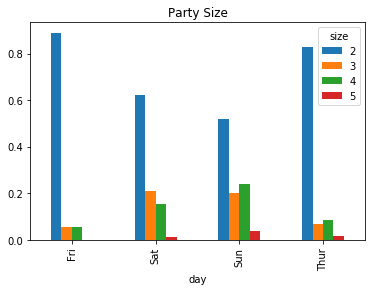

In [12]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts.plot.bar(title = 'Party Size')
party_pcts

# seaborn Plots

In [13]:
# adds new column to dataframe
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

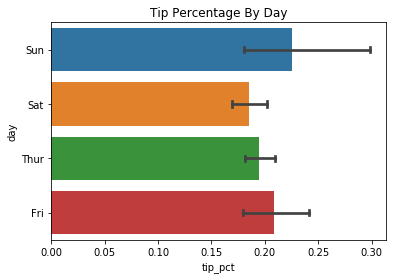

In [14]:
sns.barplot(x='tip_pct', y='day', orient='h',
           data=tips, capsize = 0.1)
plt.title('Tip Percentage By Day');

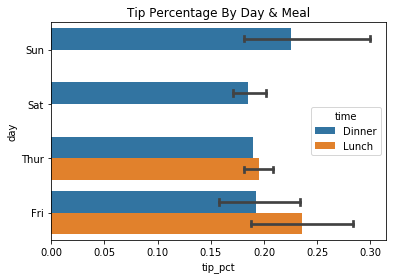

In [15]:
# use hue to split by an additional categorical variable
sns.barplot(x='tip_pct', y='day', hue='time', orient='h',
            data=tips, capsize=0.1)
plt.title('Tip Percentage By Day & Meal');

Modify appearances using `seaborn.set` by `sns.set(style='whitegrid')`.

In [16]:
sns.set(style='whitegrid')   # rerunning cells above will alter style

### Histograms & Density Plots

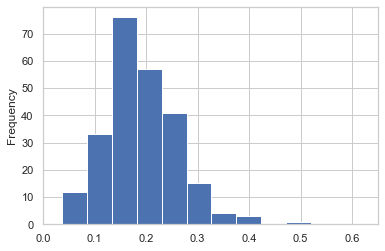

In [17]:
tips['tip_pct'].plot.hist(bins=50);
plt.xlim((0, 0.65));

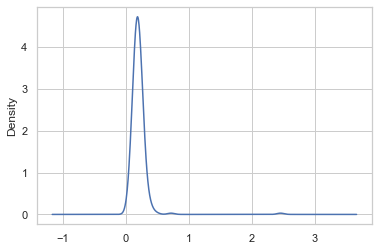

In [18]:
tips['tip_pct'].plot.density()

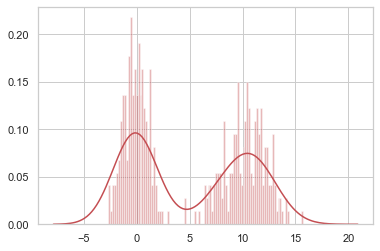

In [19]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='r');

### Scatter or Point Plots

In [20]:
# Specify filename & directory
fn = 'macrodata.csv'      # from book repository (ch 8)
fdir = 'C:/Users/Brandon/Documents/Datasets'

# Read in data into pandas dataframe
macro = pd.read_csv(fdir + '/' + fn)

In [21]:
data  = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

Plotting `unemp` vs `m1` shows this relationship is not linear.

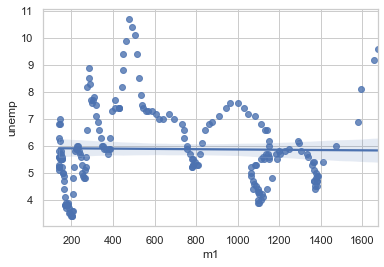

In [22]:
sns.regplot('m1', 'unemp', data=data);

Apply a log transformation with `np.log` and look at differences.

In [23]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


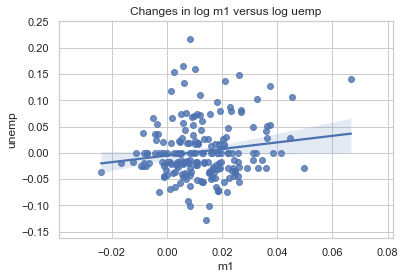

In [24]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'uemp'));